In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler , PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

import mlflow
import mlflow.sklearn

import pickle

In [4]:
df = pd.read_csv('Admission_data.csv', index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


* The dataset contains zero null values

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

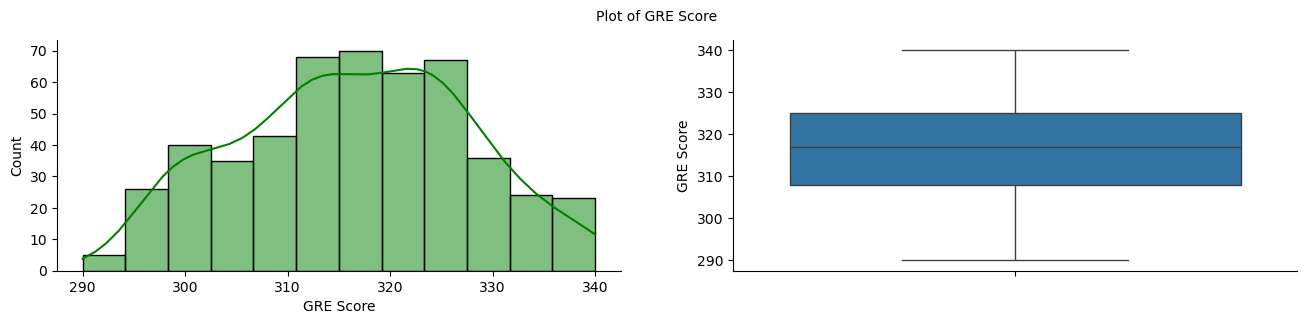

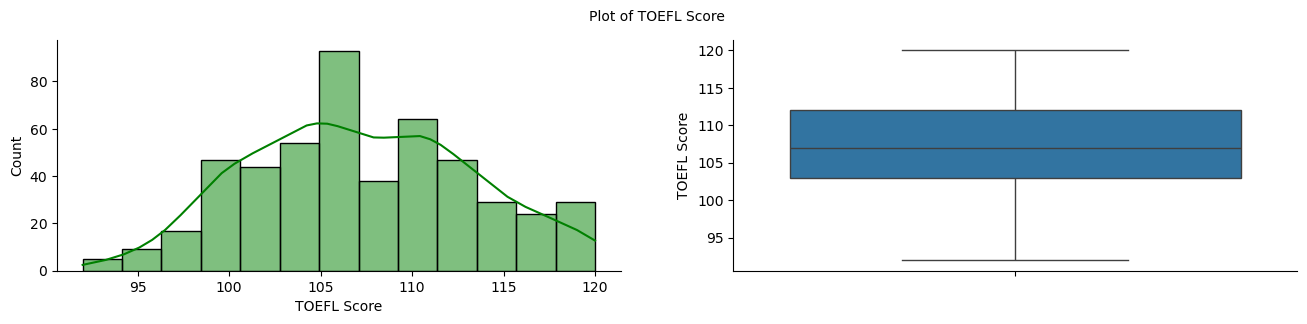

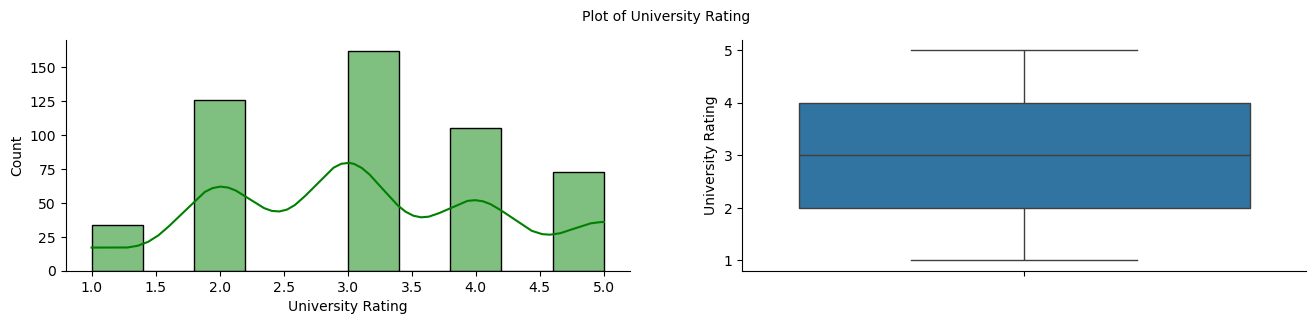

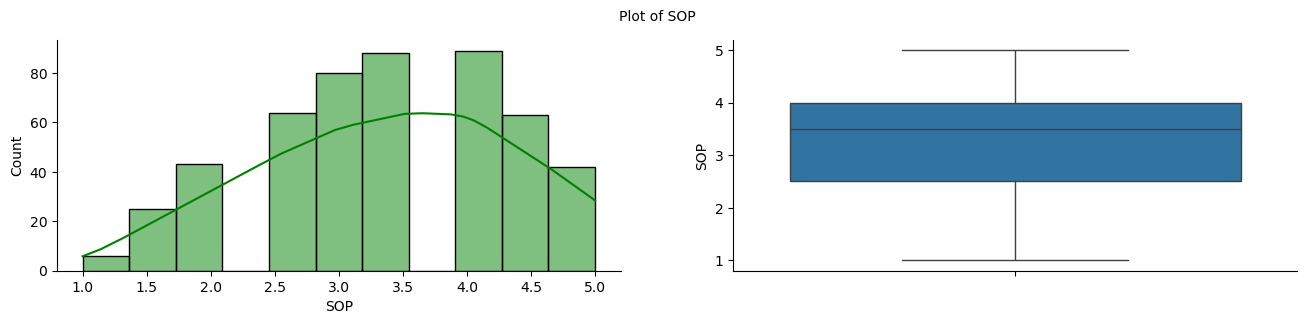

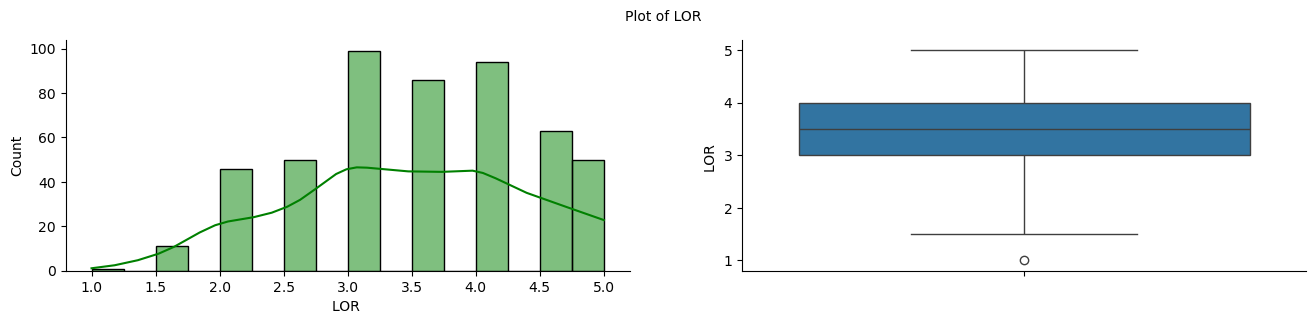

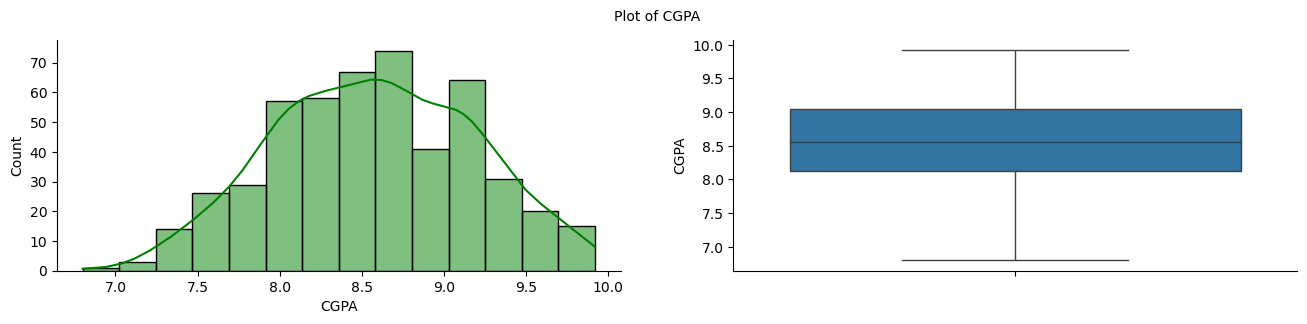

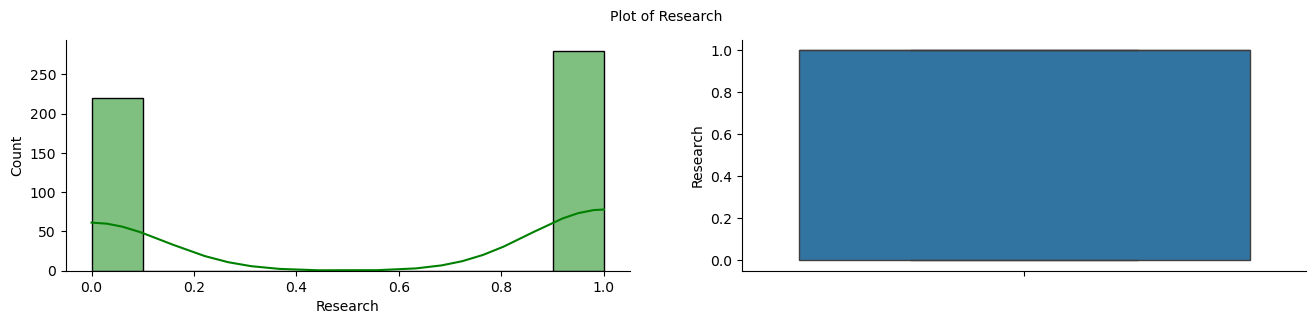

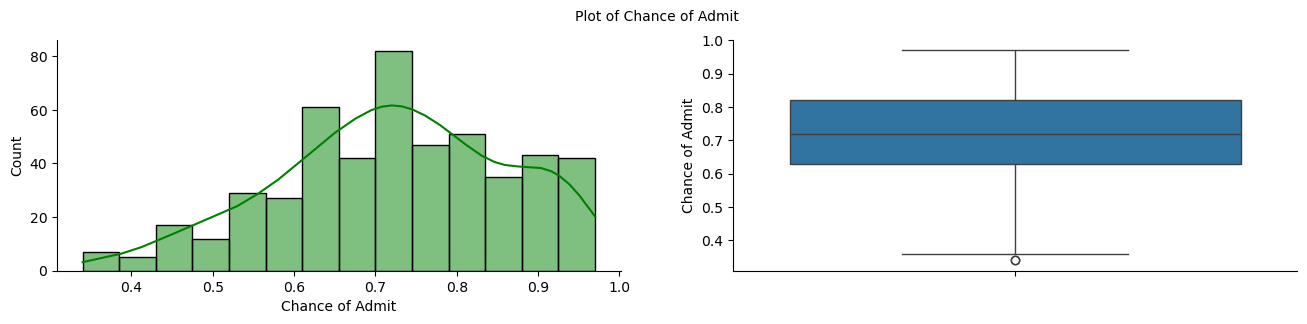

In [9]:
for i in df.columns:
    plt.style.use('default')
    plt.style.use('fast')
    plt.figure(figsize = (16,3))
    plt.subplot(122)
    sns.boxplot(df[i])
    plt.subplot(121)
    sns.histplot(df[i],kde=True,color='g')
    plt.suptitle(f'Plot of {i}',fontsize=10)
    sns.despine()
    plt.show()

* Outliers
    * There are no outliers present in the dataset except for LOR. Since range of LOR is between 1 and 5, no need to treat that outlier

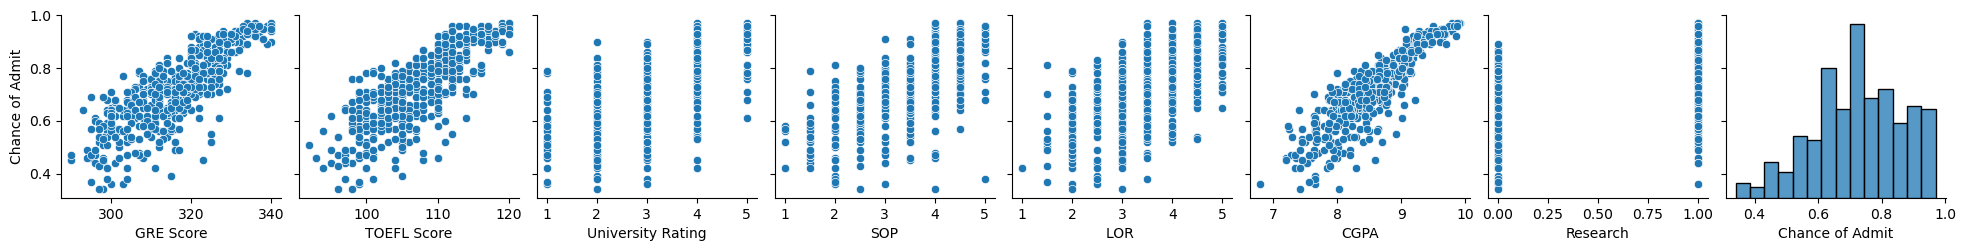

In [10]:
sns.pairplot(data=df, y_vars='Chance of Admit')
plt.show()

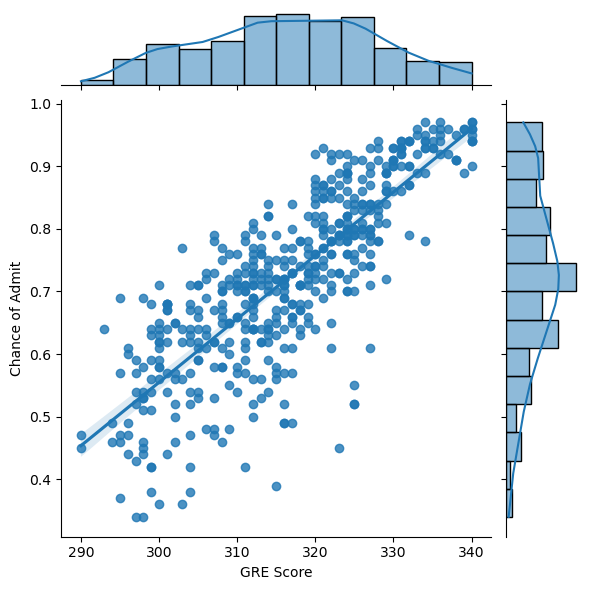

In [11]:
sns.jointplot(data=df, x = df['GRE Score'], y=df['Chance of Admit'], kind='reg')
plt.show()

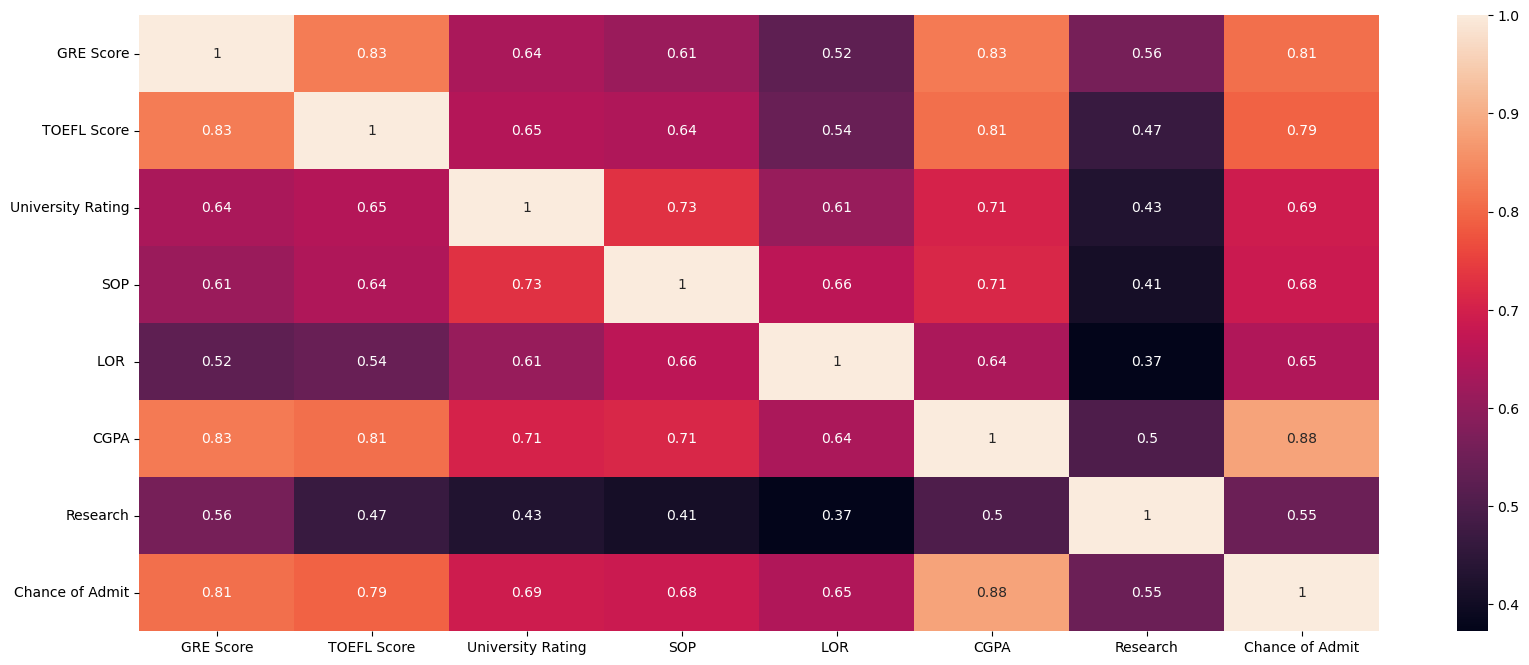

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [13]:
# Function to evaluate the model
def model_evaluation(y_true, y_pred, model):
    print(f"Model: {model}")
    print(f"R2 Score: {round(r2_score(y_true, y_pred), 3)}")
    print(f"MAE: {round(mean_absolute_error(y_true, y_pred), 3)}")
    print(f"MSE: {round(mean_squared_error(y_true, y_pred), 3)}")
    print(f"RMSE: {round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)}")
    print()

In [14]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
pickle.dump(X_train_scaled, open('x_train_scaled.pkl', 'wb'))
pickle.dump(X_test_scaled, open('x_test_scaled.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))

In [18]:
#save the scaled data into pickle file

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [19]:
mlflow.set_experiment('Admission Prediction')

<Experiment: artifact_location='file:///d:/scaler/student_enrollment_regression/mlruns/562312793288150031', creation_time=1742229201542, experiment_id='562312793288150031', last_update_time=1742229201542, lifecycle_stage='active', name='Admission Prediction', tags={}>

In [20]:
#model
lr_model = LinearRegression()

In [47]:
def ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, model, run_name, **params):
    '''
    Order of passing variables: X_train_scaled, X_test_scaled, y_train, y_test, model, run_name, **params
    '''
    with mlflow.start_run(run_name=run_name):
        #model
        model.fit(X_train_scaled, y_train)

        #prediction
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        #evaluation
        R2_Score = r2_score(y_test, y_test_pred)
        MAE = mean_absolute_error(y_test, y_test_pred)
        MSE = mean_squared_error(y_test, y_test_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

        #logging
        mlflow.log_param('model_name', model)
        mlflow.log_metric('R2_Score', R2_Score)
        mlflow.log_metric('MAE', MAE)
        mlflow.log_metric('MSE', MSE)
        mlflow.log_metric('RMSE', RMSE)

        #save the model
        mlflow.sklearn.log_model(model, 'model')

        if params:
            mlflow.log_params(params)

        model_evaluation(y_train, y_train_pred, f"{run_name}_Train")
        model_evaluation(y_test, y_test_pred, f"{run_name}_Test")

In [22]:
ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, lr_model, "lr_model_1")

2025/03/19 21:43:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: lr_model_1_Train
R2 Score: 0.824
MAE: 0.041
MSE: 0.003
RMSE: 0.058

Model: lr_model_1_Test
R2 Score: 0.806
MAE: 0.048
MSE: 0.004
RMSE: 0.066



* Training Error:

    * R² = 0.824: The model explains 82.4% of the variance in the training data, which is reasonably high.
    * Low MAE and RMSE indicate that the model is fitting the training data well without over-complicating.
* Testing Error:

    * R² = 0.806: The model explains 80.6% of the variance in the test data, closely matching the training performance.
    * Low MAE and RMSE indicate consistent predictive power on unseen data.

In [23]:
lr_model_weights = pd.DataFrame([lr_model.coef_], columns=df.columns[:-1])
lr_model_weights['Intercept'] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.021931,0.019136,0.001623,0.000794,0.017468,0.071042,0.010559,0.725575


* CGPA, LOR, and GRE scores are the strongest predictors of admission chances, with CGPA having the highest impact on the outcome.
* The intercept of 0.725 suggests that in the absence of strong qualifications, the model still predicts a high baseline admission probability, indicating a generally positive admission trend in the dataset.

In [24]:
#OLS

X_sm = sm.add_constant(X_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     263.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          7.87e-144
Time:                        21:43:30   Log-Likelihood:                 571.16
No. Observations:                 400   AIC:                            -1126.
Df Residuals:                     392   BIC:                            -1094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7256      0.003    247.569      0.0

* Multicolinearity check:
    * VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis.
    * It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.
    * VIF(j) = 1 / (1 - R(j)^2)
        * R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.
    * Calculate the VIF for each variable.
    * Identify variables with VIF greater than 5.
    * Drop the variable with the highest VIF.
    * Repeat steps 1-3 until no variable has a VIF greater than 5.

In [26]:
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.766537
0,GRE Score,4.472802
1,TOEFL Score,4.060446
3,SOP,2.779191
2,University Rating,2.746821
4,LOR,1.979681
6,Research,1.442486


* As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

* Mean of Residuals:
    * The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.

In [27]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train 

In [30]:
errors.mean()

2.0317081350640365e-16

Residual mean is closer to zero

* Normality of residuals
    * Errors should be normally distributed
    * When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.
    * If the distribution is skewed, it suggests that outliers(high error) are present.

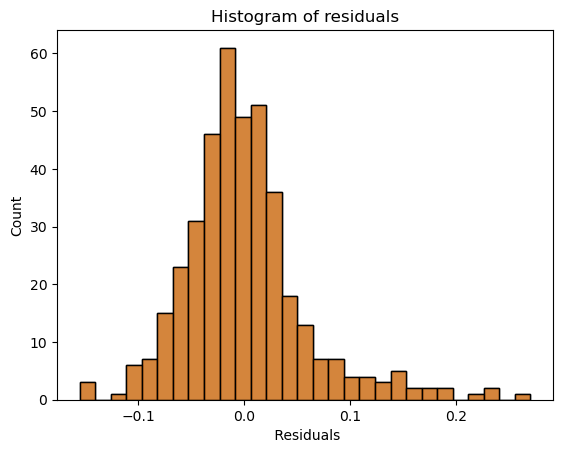

In [29]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

* This looks like a normal distribution. Let's do a normality test to check if the distribution is actually normal.

In [31]:
res = stats.shapiro(errors)
res.statistic

0.9268089558157144

* Closer the value to 1, more is the normality.
* In this case, a value of 0.926 denotes a high level of normality for the error distribuiton

* HOMOSKEDACITY
    * Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

    * When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

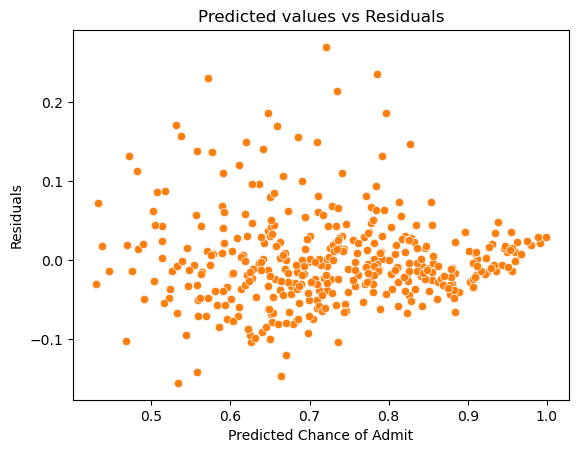

In [33]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

*  Using Goldfeld Quandt Test to check homoskedacity

    - This test is used to test the presence of Heteroscedasticity in the given data
    - The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [34]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 0.6148614857619835), ('p-value', 0.9995942745628394)]

* p-value of 0.99 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
* Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

* AUTOCORRELATION
    * Durbin Watson test
    * dw statistic ranges from 0 to 4
        * value close to 2 suggest no autocorrelation
        * value less than 2 suggests positive autocorrelation
        * value greater than 2 suggests negative autocorrelation

In [35]:
dw = sms.durbin_watson(errors)
dw

1.9923357953553258

* dw statistic is close to zero, suggesting that there is no autocorrelation

* Lasso and Ridge Regression - L1 & L2 Regularization
    * Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.
    * Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
    * Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [50]:
from sklearn.model_selection import GridSearchCV
# Define alpha range
alpha_range = np.logspace(-5, 5, 100)  # Small to large values of alpha

# --- LASSO with GridSearchCV ---
lasso = Lasso(max_iter=1000)
grid_lasso = GridSearchCV(
    lasso, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_lasso.fit(X_train_scaled, y_train)

# Optimal alpha for Lasso
optimal_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Optimal alpha for Lasso (GridSearchCV): {optimal_alpha_lasso}")

# best model using grid search
best_lasso = grid_lasso.best_estimator_
print(best_lasso)

# --- RIDGE with GridSearchCV ---
ridge = Ridge(max_iter=1000)
grid_ridge = GridSearchCV(
    ridge, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_ridge.fit(X_train_scaled, y_train)

# Optimal alpha for Ridge
optimal_alpha_ridge = grid_ridge.best_params_['alpha']
print(f"Optimal alpha for Ridge (GridSearchCV): {optimal_alpha_ridge}")

# best model using grid search
best_ridge = grid_ridge.best_estimator_
print(best_ridge)


Optimal alpha for Lasso (GridSearchCV): 0.0005214008287999684
Lasso(alpha=0.0005214008287999684)
Optimal alpha for Ridge (GridSearchCV): 3.593813663804626
Ridge(alpha=3.593813663804626, max_iter=1000)


In [51]:
ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, best_lasso, "lasso_regression", **{'alpha': optimal_alpha_lasso})
ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, best_ridge, "ridge_regression", **{'alpha': optimal_alpha_ridge})

2025/03/20 00:05:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: lasso_regression_Train
R2 Score: 0.824
MAE: 0.041
MSE: 0.003
RMSE: 0.058

Model: lasso_regression_Test
R2 Score: 0.806
MAE: 0.048
MSE: 0.004
RMSE: 0.066



2025/03/20 00:05:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: ridge_regression_Train
R2 Score: 0.824
MAE: 0.041
MSE: 0.003
RMSE: 0.058

Model: ridge_regression_Test
R2 Score: 0.807
MAE: 0.047
MSE: 0.004
RMSE: 0.066



* For lasso regression, optimal alpha values is close to zero which means there is no regularization term indicating that all the features are important
* Compared to lasso, ridge regression got higher alpha value as lasso eliminates the features by making weights zero but ridge cannot do that. So higher alpha value indicates that weights are learnt in ridge regression but not nullified.
* Looking at the metrics, all the models train r2_score is same but for inference ridge regression has marginally higher r2_score. Therefore it is safe to say that we can use ridge regression for predicting the chance of admission probability.
